In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pandemic = pd.read_csv("final/Confirmed cases and deaths.csv")
prepandemic = pd.read_csv("final/prepandemic_v2.csv")
unemployment = pd.read_csv("final/Unemployment_v1.csv")

# Remove all Puerto Rico data
pandemic = pandemic.drop(pandemic[pandemic['stname'] == 'Puerto Rico'].index)

/Users/h0y01c9/opt/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (309,312,314,317,329,332,334) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Need state and county name
state = pandemic['stname']
county = pandemic['ctyname']

# The confirmed cases and death number is accumulated, used the last available date data
confirmed_cases = pandemic['confirmed_cases_20200502']
deaths = pandemic['death20200502']

In [4]:
# Get days between first confirmed case to now
import datetime
def days(pandemic_row, start = datetime.datetime(2020,1,22), end = datetime.datetime(2020,4,18), min_number = 200, min_precent=0.3):
    end_title = 'confirmed_cases_' +  end.strftime("%Y%m%d")
    
    total_days = (end - start).days + 1
    min_cases = min(pandemic_row[end_title] * min_precent, min_number)

    current = start
    accumulate_cases = 0
    days = 0
    while current <= end:
        title = 'confirmed_cases_' +  current.strftime("%Y%m%d")
        accumulate_cases += pandemic_row[title]
        if accumulate_cases < min_cases:
            days += 1
        else:
            break

        current += datetime.timedelta(days=1)
    
    return total_days - days
case_days = pandemic.apply(lambda x: days(x,end = datetime.datetime(2020,5,2)), axis = 1) 

In [5]:
# Use year 2018(closest) population density
populationdensity=prepandemic['popdensity_2018']
populationdensity_min = populationdensity.min()
populationdensity_mean = populationdensity.mean()
populationdensity_stage = populationdensity_mean - populationdensity_min
def populationdensity_category(populationdensity):
    if populationdensity < populationdensity_mean - populationdensity_stage * 0.9: 
        return '1_Very Low' 
    elif populationdensity < populationdensity_mean - populationdensity_stage * 0.3: 
        return '2_Low'  
    elif populationdensity < populationdensity_mean + populationdensity_stage * 0.3: 
        return '3_Medium'   
    elif populationdensity < populationdensity_mean + populationdensity_stage: 
        return '4_High' 
    else:
        return 'Very_High'
populationdensity_category = prepandemic.apply(lambda x: populationdensity_category(x['popdensity_2018']), axis = 1)

In [6]:
# Get top 3 most populations ethnicity group in the county
def ethnic_group_top(hispanic, white, black, indian, asian, hawaii_na, top):
    ethnic_groups = [('Hispanic', hispanic), ('White', white), ('Black', black), ('Indian', indian), ('Asian', asian), ('Hawaii and N/A', hawaii_na)]
    ethnic_groups = sorted(ethnic_groups, key = lambda x: -x[1])
    return ethnic_groups[top - 1][0]

ethnic_group_top1 = prepandemic.apply(lambda x: ethnic_group_top(x['hispanic_2018'], x['nhwhite_2018'], x['nhblack_2018'], x['nhindian_2018'], x['nhasian_2018'], x['nhhawaii_2018'], 1), axis = 1)
ethnic_group_top2 = prepandemic.apply(lambda x: ethnic_group_top(x['hispanic_2018'], x['nhwhite_2018'], x['nhblack_2018'], x['nhindian_2018'], x['nhasian_2018'], x['nhhawaii_2018'], 2), axis = 1)
ethnic_group_top3 = prepandemic.apply(lambda x: ethnic_group_top(x['hispanic_2018'], x['nhwhite_2018'], x['nhblack_2018'], x['nhindian_2018'], x['nhasian_2018'], x['nhhawaii_2018'], 3), axis = 1)

In [7]:
# Age data has 18 columns, we group them to children, young adult, middle adult, senior
# column1:  age 0-4 prop.
# column2:  age 5-9 prop.
# column3:  age 10-14 prop.
# column4:  age 15-19 prop.
# column5:  age 20-24 prop.
# column6:  age 25-29 prop.
# column7:  age 30-34 prop.
# column8:  age 35-39 prop.
# column9:  age 40-44 prop.
# column10: age 45-49 prop.
# column11: age 50-54 prop.
# column12: age 55-59 prop.
# column13: age 60-64 prop.
# column14: age 65-69 prop.
# column15: age 70-74 prop.
# column16: age 75-79 prop.
# column17: age 80-84 prop.
# column18: age 85+ prop.
def age_group_top(age, top):
    children_poportion = age[0] + age[1] + age[2] + age[3]
    young_adult_poportion = age[4] + age[5] + age[6] + age[7] + age[8]
    middle_adult_poportion = age[9] + age[10] + age[11] + age[12]
    senior_poportion = age[13] + age[14] + age[15] + age[16] + age[17]
    age_group_list = [('Children', children_poportion), ('Young Adult', young_adult_poportion), ('Middle Adult', middle_adult_poportion), ('Senior', senior_poportion)]
    age_group_list = sorted(age_group_list, key = lambda x: -x[1])
    return age_group_list[top - 1][0]
age_groups_top1 = prepandemic.apply(lambda x: age_group_top([x['ageg1_2018'], x['ageg2_2018'], x['ageg3_2018'], x['ageg4_2018'], x['ageg5_2018'], x['ageg6_2018'], x['ageg7_2018'], x['ageg8_2018'], x['ageg9_2018'], x['ageg10_2018'], x['ageg11_2018'], x['ageg12_2018'], x['ageg13_2018'], x['ageg14_2018'], x['ageg15_2018'], x['ageg16_2018'], x['ageg17_2018'], x['ageg18_2018']], 1), axis = 1)
age_groups_top2 = prepandemic.apply(lambda x: age_group_top([x['ageg1_2018'], x['ageg2_2018'], x['ageg3_2018'], x['ageg4_2018'], x['ageg5_2018'], x['ageg6_2018'], x['ageg7_2018'], x['ageg8_2018'], x['ageg9_2018'], x['ageg10_2018'], x['ageg11_2018'], x['ageg12_2018'], x['ageg13_2018'], x['ageg14_2018'], x['ageg15_2018'], x['ageg16_2018'], x['ageg17_2018'], x['ageg18_2018']], 2), axis = 1)
age_groups_top3 = prepandemic.apply(lambda x: age_group_top([x['ageg1_2018'], x['ageg2_2018'], x['ageg3_2018'], x['ageg4_2018'], x['ageg5_2018'], x['ageg6_2018'], x['ageg7_2018'], x['ageg8_2018'], x['ageg9_2018'], x['ageg10_2018'], x['ageg11_2018'], x['ageg12_2018'], x['ageg13_2018'], x['ageg14_2018'], x['ageg15_2018'], x['ageg16_2018'], x['ageg17_2018'], x['ageg18_2018']], 3), axis = 1)
age_groups_top4 = prepandemic.apply(lambda x: age_group_top([x['ageg1_2018'], x['ageg2_2018'], x['ageg3_2018'], x['ageg4_2018'], x['ageg5_2018'], x['ageg6_2018'], x['ageg7_2018'], x['ageg8_2018'], x['ageg9_2018'], x['ageg10_2018'], x['ageg11_2018'], x['ageg12_2018'], x['ageg13_2018'], x['ageg14_2018'], x['ageg15_2018'], x['ageg16_2018'], x['ageg17_2018'], x['ageg18_2018']], 4), axis = 1)

In [8]:
# Get all education adata
education = pd.read_excel("final/Education_By_County.xls")
education = education.drop(education[pd.isna(education['2013 Rural-urban Continuum Code'])].index)

In [9]:
states_map = pd.read_csv("final/states.csv")
states_map

for index, row in states_map.iterrows():
    pc = len(pandemic[pandemic['stname'] == row[1]])
    ec = len(education[education['State'] == row[0]])
    if pc != ec:
        print(f"In education data set[{row[0]}]: {ec} rows, in pandemic dataset[{row[1]}]: {pc} rows")  

In education data set[VA]: 134 rows, in pandemic dataset[Virginia]: 133 rows
In education data set[PR]: 78 rows, in pandemic dataset[Puerto Rico]: 0 rows


In [10]:
va_pandemic = pandemic[pandemic['stname'] == 'Virginia']
va_education = education[education['State'] == 'VA']
for index, row in va_education.iterrows():
    area = row['Area name']
    if len(va_pandemic[va_pandemic['ctyname'] == area]) == 0:
        print(f"{area} is missing in va_pandemic")

Bedford city is missing in va_pandemic


In [11]:
education = education.drop(education[education['Area name'] == 'Bedford city'].index)

#education['Percent of adults completing some college or associate\'s degree, 2014-18']
# education['Percent of adults with a bachelor\'s degree or higher, 2014-18']

# Age data has 18 columns, we group them to children, young adult, middle adult, senior
# column1:  less than high school diploma poportion.
# column2:  high school diploma only poportion.
# column3:  some college or associate degress poportion.
# column4:  bachelor or higher education poportion.
def education_group_top(less_than_high_school, high_school, college, bachelor_above, top):
    education_group = [('Less_than_high_school', less_than_high_school), ('High_school', high_school), ('Some_college_or_associate', college), ('Bachelor_Or_Above', bachelor_above)]
    education_group = sorted(education_group, key = lambda x: -x[1])
    return education_group[top - 1][0]

education_group_top1 = education.apply(lambda x: education_group_top(x['Percent of adults with less than a high school diploma, 2014-18'], 
                                                                     x['Percent of adults with a high school diploma only, 2014-18'], 
                                                                     x['Percent of adults completing some college or associate\'s degree, 2014-18'], 
                                                                     x['Percent of adults with a bachelor\'s degree or higher, 2014-18'], 1), axis=1)
education_group_top2 = education.apply(lambda x: education_group_top(x['Percent of adults with less than a high school diploma, 2014-18'], 
                                                                     x['Percent of adults with a high school diploma only, 2014-18'], 
                                                                     x['Percent of adults completing some college or associate\'s degree, 2014-18'], 
                                                                     x['Percent of adults with a bachelor\'s degree or higher, 2014-18'], 2), axis=1)
education_group_top3 = education.apply(lambda x: education_group_top(x['Percent of adults with less than a high school diploma, 2014-18'], 
                                                                     x['Percent of adults with a high school diploma only, 2014-18'], 
                                                                     x['Percent of adults completing some college or associate\'s degree, 2014-18'], 
                                                                     x['Percent of adults with a bachelor\'s degree or higher, 2014-18'], 3), axis=1)
education_group_top4 = education.apply(lambda x: education_group_top(x['Percent of adults with less than a high school diploma, 2014-18'], 
                                                                     x['Percent of adults with a high school diploma only, 2014-18'], 
                                                                     x['Percent of adults completing some college or associate\'s degree, 2014-18'], 
                                                                     x['Percent of adults with a bachelor\'s degree or higher, 2014-18'], 4), axis=1)

In [12]:
populations = pd.read_excel("final/co-est2019-annres.xlsx")
populations['county'] = populations['Geographic Area'].apply(lambda x: x.split(',')[0][1:])
populations['state'] = populations['Geographic Area'].apply(lambda x: x.split(',')[1])
population = populations['Census']

In [13]:
result = pd.concat([state, county], axis=1)
                    
result['confirmed_cases'] = confirmed_cases
result['deaths'] = deaths
result['population'] = population
result['days'] = case_days
result['avearge_case'] = (100000.0) * confirmed_cases / case_days / population # Daily confirmed case per 100k people
result['total_cases'] = confirmed_cases
result['populationdensity'] = populationdensity_category
result['toppest_ethnicity'] = ethnic_group_top1
result['second_ethnicity'] = ethnic_group_top2
result['third_ethnicity'] = ethnic_group_top3
result['toppest_age_group'] = age_groups_top1
result['second_age_group'] = age_groups_top2
result['third_age_group'] = age_groups_top3
result['fourth_age_group'] = age_groups_top4
result['top_education'] = education_group_top1
result['second_top_education'] = education_group_top2
result['popdensity'] = prepandemic['popdensity_2018']
result['precent_Hispanic'] = prepandemic['hispanic_2018'] 
result['precent_White'] = prepandemic['nhwhite_2018'] 
result['precent_Black'] = prepandemic['nhblack_2018'] 
result['precent_Idian'] = prepandemic['nhindian_2018'] 
result['precent_Asian'] = prepandemic['nhasian_2018'] 
result['precent_Hawaii'] = prepandemic['nhhawaii_2018']
result['bachelor'] = education['Percent of adults with a bachelor\'s degree or higher, 2014-18']
result['college'] = education['Percent of adults completing some college or associate\'s degree, 2014-18']
result['highschool'] = education['Percent of adults with a high school diploma only, 2014-18']
result['lessthanhighschool'] = education['Percent of adults with less than a high school diploma, 2014-18']
result['precent_under_20'] = prepandemic['ageg1_2018'] + prepandemic['ageg2_2018'] + prepandemic['ageg3_2018'] + prepandemic['ageg4_2018']
result['precent_20_to_40'] = prepandemic['ageg5_2018'] + prepandemic['ageg6_2018'] + prepandemic['ageg7_2018'] + prepandemic['ageg8_2018'] + prepandemic['ageg9_2018']
result['precent_40_to_60'] = prepandemic['ageg10_2018'] + prepandemic['ageg11_2018'] + prepandemic['ageg12_2018'] + prepandemic['ageg13_2018']
result['precent_above_60'] = prepandemic['ageg14_2018'] + prepandemic['ageg15_2018'] + prepandemic['ageg16_2018'] + prepandemic['ageg17_2018'] + prepandemic['ageg18_2018']

In [59]:
# Target is 5 groups, very low, low, medium, high and very high
def target_group(rank, total):
    if (rank <= total / 5.0):
        return "Very_Low"
    if (rank <= total * 2.0 / 5.0):
        return "Low"
    if (rank <= total * 3.0 / 5.0):
        return "Medium"
    if (rank <= total * 4.0 / 5.0):
        return "High"
    return "Very_High"

# Binary Target only has low and high
def binary_target_group(rank, total):
    if (rank <= total / 2.0):
        return "Low"
    return "High"

total = len(result)

result['target_rank'] = result['avearge_case'].rank().apply(lambda r: target_group(r, total))
result['binary_target_rank'] = result['avearge_case'].rank().apply(lambda r: binary_target_group(r, total))

In [60]:
result.head()

,stname,ctyname,confirmed_cases,deaths,population,days,avearge_case,total_cases,populationdensity,toppest_ethnicity,...,bachelor,college,highschool,lessthanhighschool,precent_under_20,precent_20_to_40,precent_40_to_60,precent_above_60,target_rank,binary_target_rank
0,Alabama,Autauga County,45,3,54571,37,2.228686,45,2_Low,White,...,27.7,28.4,32.6,11.3,0.259420,0.316235,0.268718,0.155627,Medium,High
1,Alabama,Baldwin County,181,4,182265,35,2.837313,181,2_Low,White,...,31.3,31.3,27.6,9.7,0.236994,0.282857,0.275715,0.204433,Medium,High
2,Alabama,Barbour County,43,1,27457,25,6.264341,43,2_Low,Black,...,12.2,25.1,35.7,27.0,0.228769,0.318275,0.258752,0.194204,High,High
3,Alabama,Bibb County,42,0,22915,30,6.109535,42,2_Low,White,...,11.5,24.4,47.3,16.8,0.225536,0.338482,0.271250,0.164732,High,High
4,Alabama,Blount County,40,0,57322,36,1.938368,40,2_Low,White,...,12.6,33.5,34.0,19.8,0.253544,0.297009,0.267082,0.182365,Medium,Low


In [61]:
result['binary_target_rank'].value_counts()

High    1571
Low     1571
Name: binary_target_rank, dtype: int64

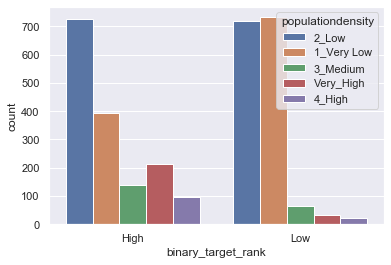

In [65]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="binary_target_rank", hue='populationdensity', data=result)

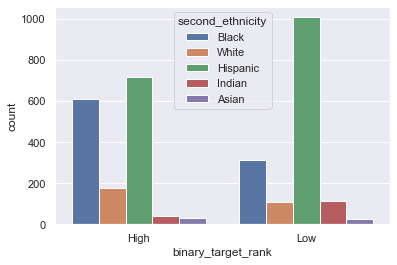

In [67]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="binary_target_rank", hue='second_ethnicity', data=result)

In [15]:
result.to_csv('final/model.csv')

In [16]:
X = result[['populationdensity', 'toppest_ethnicity', 'second_ethnicity', 'third_ethnicity',
           'toppest_age_group', 'second_age_group', 'third_age_group', 'fourth_age_group',
           'top_education', 'second_top_education', 'popdensity', 'precent_Hispanic',
           'precent_White', 'precent_Black', 'precent_Idian', 'precent_Asian', 'precent_Hawaii',
           'bachelor', 'college', 'highschool', 'lessthanhighschool', 'precent_under_20',
           'precent_20_to_40', 'precent_40_to_60', 'precent_above_60', 'avearge_case', 'total_cases']]

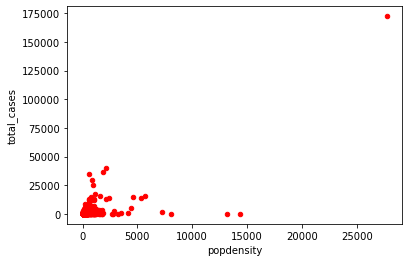

In [17]:
result.plot(kind='scatter', x='popdensity', y='total_cases', color='red')

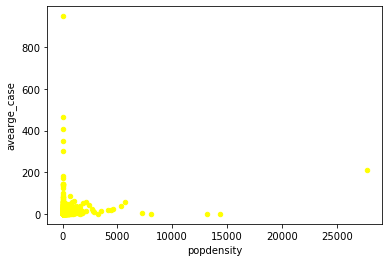

In [18]:
result.plot(kind='scatter', x='popdensity', y='avearge_case', color='yellow')

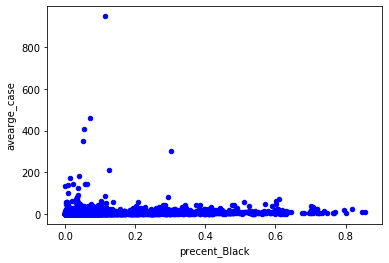

In [19]:
result.plot(kind='scatter', x='precent_Black', y='avearge_case', color='blue')

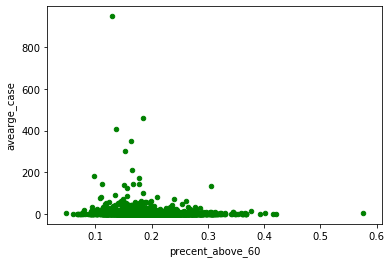

In [21]:
result.plot(kind='scatter', x='precent_above_60', y='avearge_case', color='green')

In [24]:
popdensity_and_cases = result[['popdensity', 'avearge_case']]
popdensity_and_cases.corr(method='pearson')

,popdensity,avearge_case
popdensity,1.000000,0.129762
avearge_case,0.129762,1.000000


In [25]:
popdensity_and_cases.corr(method='kendall')

,popdensity,avearge_case
popdensity,1.000000,0.262035
avearge_case,0.262035,1.000000


In [26]:
popdensity_and_cases.corr(method='spearman')

,popdensity,avearge_case
popdensity,1.000000,0.371283
avearge_case,0.371283,1.000000


In [ ]:
popdensity_and_cases = result[['popdensity', 'avearge_case']]

In [41]:
btr = result['binary_target_rank'].apply(lambda x: 0 if x == 'Low' else 1)
from scipy import stats
stats.pointbiserialr(btr, result['avearge_case'])

PointbiserialrResult(correlation=0.20873892568434554, pvalue=2.850889028422605e-32)

In [44]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [48]:
label_encoder = LabelEncoder()
populationdensity_onehot = label_encoder.fit_transform(populationdensity_category)
ethnic_group_top1_onehot = label_encoder.fit_transform(ethnic_group_top1)
ethnic_group_top2_onehot = label_encoder.fit_transform(ethnic_group_top2)
ethnic_group_top3_onehot = label_encoder.fit_transform(ethnic_group_top3)

age_groups_top1_onehot = label_encoder.fit_transform(age_groups_top1)
age_groups_top2_onehot = label_encoder.fit_transform(age_groups_top2)
age_groups_top3_onehot = label_encoder.fit_transform(age_groups_top3)
age_groups_top4_onehot = label_encoder.fit_transform(age_groups_top4)
education_group_top1_onehot = label_encoder.fit_transform(education_group_top1)
education_group_top2_onehot = label_encoder.fit_transform(education_group_top2)
binary_target_rank_onehot = label_encoder.fit_transform(result['binary_target_rank'])

In [53]:
po = populationdensity_onehot.reshape(-1, 1)

In [54]:
mutual_info_classif(po, binary_target_rank_onehot, discrete_features=True)

array([0.05288435])

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)